# Car data set 

# Prblem Statemet:
The goal of this project is to analyze and predict car performance and fuel efficiency metrics based on a variety of features related to the vehicle's specifications. 

In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [32]:
df1 = pd.read_csv("B:\\7th sem\\Bootcamp\\ML\\car_data.csv")

In [33]:
df1.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


In [34]:
df1.tail()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
545,23,compact car,27,4.0,2.0,awd,gas,33,bmw,430i xdrive gran coupe,a,2024
546,21,midsize car,24,6.0,3.0,rwd,gas,29,bmw,840i gran coupe,a,2024
547,21,midsize car,24,6.0,3.0,awd,gas,29,bmw,840i xdrive gran coupe,a,2024
548,17,midsize car,19,8.0,4.4,awd,gas,24,bmw,m850i xdrive gran coupe,a,2024
549,17,midsize car,19,8.0,4.4,awd,gas,24,bmw,alpina b8 gran coupe,a,2024


In [35]:
df1.shape

(550, 12)

In [36]:
df1.columns

Index(['city_mpg', 'class', 'combination_mpg', 'cylinders', 'displacement',
       'drive', 'fuel_type', 'highway_mpg', 'make', 'model', 'transmission',
       'year'],
      dtype='object')

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB


In [39]:
df1.isnull().sum()

city_mpg           0
class              0
combination_mpg    0
cylinders          2
displacement       2
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

In [40]:
df1.describe()

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year
count,550.000000,550.000000,548.000000,548.000000,550.000000,550.000000
mean,21.460000,24.069091,5.315693,2.931752,28.609091,2019.000000
std,8.147392,7.478369,1.759999,1.248419,6.832228,3.165156
min,11.000000,14.000000,3.000000,1.200000,18.000000,2014.000000
25%,17.000000,20.000000,4.000000,2.000000,24.000000,2016.000000
50%,20.000000,23.000000,4.000000,2.500000,28.000000,2019.000000
75%,24.000000,27.000000,6.000000,3.500000,32.000000,2022.000000
max,126.000000,112.000000,12.000000,6.800000,102.000000,2024.000000


In [41]:
df1.corr()

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year
city_mpg,1.000000,0.991671,-0.724249,-0.738363,0.944696,0.100795
combination_mpg,0.991671,1.000000,-0.750464,-0.763750,0.974735,0.105272
cylinders,-0.724249,-0.750464,1.000000,0.940534,-0.715528,-0.203856
displacement,-0.738363,-0.763750,0.940534,1.000000,-0.726599,-0.239668
highway_mpg,0.944696,0.974735,-0.715528,-0.726599,1.000000,0.118513
year,0.100795,0.105272,-0.203856,-0.239668,0.118513,1.000000


<AxesSubplot:>

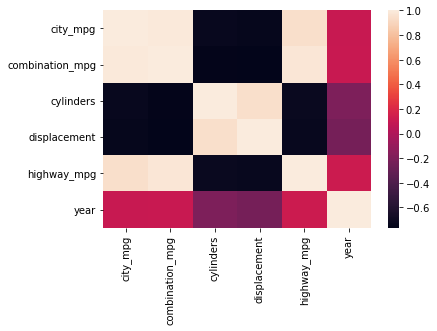

In [42]:
sns.heatmap(df1.corr())

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
label_encoder = LabelEncoder()

In [45]:
cate_columns = ['class', 'drive', 'fuel_type', 'make', 'model', 'transmission']
for col in cate_columns:
    df1[col] = label_encoder.fit_transform(df1[col])

In [46]:
df1.dropna(inplace=True)

In [47]:
df1.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,2,29,4.0,2.5,2,2,36,19,15,1,2014
1,26,2,30,4.0,2.5,2,2,37,19,15,0,2014
2,25,7,27,4.0,2.5,2,2,31,19,74,0,2014
3,26,7,29,4.0,2.0,2,2,34,19,74,1,2014
4,26,7,28,4.0,2.0,2,2,32,19,74,0,2014


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         548 non-null    int64  
 1   class            548 non-null    int32  
 2   combination_mpg  548 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            548 non-null    int32  
 6   fuel_type        548 non-null    int32  
 7   highway_mpg      548 non-null    int64  
 8   make             548 non-null    int32  
 9   model            548 non-null    int32  
 10  transmission     548 non-null    int32  
 11  year             548 non-null    int64  
dtypes: float64(2), int32(6), int64(4)
memory usage: 42.8 KB


In [55]:
df1.isnull().sum()

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

In [56]:
x = df1.drop(['city_mpg'], axis = 1)
y = df1['city_mpg']

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=20)

In [58]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [63]:
y_pred = model.predict(x_test)
print(f"Accuracy:{model.score(x_test, y_test)}")

Accuracy:0.9739590183339033
